In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
covid = pd.read_csv("covid.csv", na_values = "NA")
covid

,continent,country_names,total_cases_of_countries,total_deaths1,total_recovered1,active_cases1,total_population1
0,North America,USA,101825079,1113307.0,98932846.0,1778926.0,3.348053e+08
1,Asia,India,44677346,530677.0,44142032.0,4637.0,1.406632e+09
2,Europe,France,38899905,160617.0,37617800.0,1121488.0,6.558452e+07
3,Europe,Germany,37035898,160045.0,36312800.0,563053.0,8.388360e+07
4,South America,Brazil,35943720,691994.0,34609068.0,642658.0,2.153536e+08
...,...,...,...,...,...,...,...
225,Australia/Oceania,Niue,291,NaN,202.0,89.0,1.622000e+03
226,Europe,Vatican City,29,NaN,29.0,0.0,7.990000e+02
227,Africa,Western Sahara,10,1.0,9.0,0.0,6.261610e+05
228,NaN,MS Zaandam,9,2.0,7.0,0.0,NaN


In [3]:
covid.describe(include = "all")

,continent,country_names,total_cases_of_countries,total_deaths1,total_recovered1,active_cases1,total_population1
count,228,230,2.300000e+02,2.250000e+02,2.100000e+02,2.110000e+02,2.280000e+02
unique,6,230,NaN,NaN,NaN,NaN,NaN
top,Africa,USA,NaN,NaN,NaN,NaN,NaN
freq,58,1,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,2.863195e+06,2.966383e+04,2.919695e+06,8.638593e+04,3.484620e+07
std,NaN,NaN,9.246378e+06,1.041131e+05,9.271727e+06,4.786812e+05,1.389233e+08
min,NaN,NaN,9.000000e+00,1.000000e+00,2.000000e+00,0.000000e+00,7.990000e+02
25%,NaN,NaN,2.477500e+04,2.100000e+02,2.147975e+04,1.340000e+02,5.170965e+05
50%,NaN,NaN,2.068515e+05,2.179000e+03,2.349760e+05,1.804000e+03,5.816378e+06
75%,NaN,NaN,1.288717e+06,1.435300e+04,1.446873e+06,1.664500e+04,2.254928e+07


In [4]:
covid = covid.dropna().reset_index(drop=True)
covid

,continent,country_names,total_cases_of_countries,total_deaths1,total_recovered1,active_cases1,total_population1
0,North America,USA,101825079,1113307.0,98932846.0,1778926.0,3.348053e+08
1,Asia,India,44677346,530677.0,44142032.0,4637.0,1.406632e+09
2,Europe,France,38899905,160617.0,37617800.0,1121488.0,6.558452e+07
3,Europe,Germany,37035898,160045.0,36312800.0,563053.0,8.388360e+07
4,South America,Brazil,35943720,691994.0,34609068.0,642658.0,2.153536e+08
...,...,...,...,...,...,...,...
199,Asia,Macao,1427,11.0,854.0,562.0,6.674900e+05
200,North America,Montserrat,1403,8.0,1376.0,19.0,4.965000e+03
201,Australia/Oceania,Wallis and Futuna,761,7.0,438.0,316.0,1.098200e+04
202,Africa,Western Sahara,10,1.0,9.0,0.0,6.261610e+05


In [5]:
data = covid.drop(covid.columns[[0, 1, 5]], axis = 'columns') #Removed the non-numerical data columns and 
                                                              #active-cases column since 
                                                              #activecases = totalcases-totalrecovered-totaldeaths
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 204 entries, 0 to 203
Data columns (total 4 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   total_cases_of_countries  204 non-null    int64  
 1   total_deaths1             204 non-null    float64
 2   total_recovered1          204 non-null    float64
 3   total_population1         204 non-null    float64
dtypes: float64(3), int64(1)
memory usage: 6.5 KB


In [6]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()  

data = scaler.fit_transform(data)

In [7]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 3)
principalComponents = pca.fit_transform(data)

principal_data = pd.DataFrame(data = principalComponents, columns = ['PC1', 'PC2', 'PC3'])

In [8]:
final = pd.concat([covid["continent"], covid["country_names"], principal_data], axis = 1)
final

,continent,country_names,PC1,PC2,PC3
0,North America,USA,17.300980,-3.500950,0.293804
1,Asia,India,10.186708,6.538457,-0.091612
2,Europe,France,4.790979,-1.489434,-1.877055
3,Europe,Germany,4.643147,-1.301416,-1.760339
4,South America,Brazil,7.387215,-0.984027,2.386461
...,...,...,...,...,...
199,Asia,Macao,-0.593557,-0.073786,0.019190
200,North America,Montserrat,-0.594951,-0.078097,0.019424
201,Australia/Oceania,Wallis and Futuna,-0.595035,-0.078022,0.019477
202,Africa,Western Sahara,-0.593826,-0.073994,0.019222


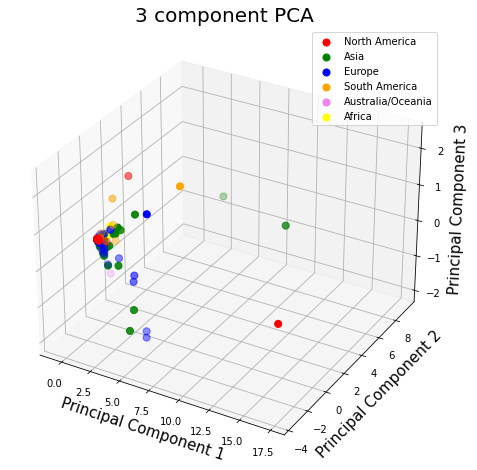

In [10]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_zlabel('Principal Component 3', fontsize = 15)
ax.set_title('3 component PCA', fontsize = 20)

targets = final["continent"].unique()
colors = ['red', 'green','blue','orange','violet','yellow']
for target, color in zip(targets,colors):
    indicesToKeep = final["continent"] == target
    ax.scatter(final.loc[indicesToKeep, 'PC1']
               , final.loc[indicesToKeep, 'PC2']
               , final.loc[indicesToKeep, 'PC3']
               , c = color
               , s = 50)
ax.legend(targets)
ax.grid()

In [9]:
print(pca.explained_variance_ratio_)
sum(pca.explained_variance_ratio_)

[0.76626866 0.19558027 0.0379243 ]


0.999773223519814